In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets, transforms

In [5]:
#define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5,0.5),
                                                   (0.5, 0.5, 0.5))
                               ])
#download the training set data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

Processing...
Done!


We have the training data loaded into trainloader and we can make that an iterator with iter(trainloader) 

batch_size=64 -- number of images in one iteration.
We can see that the images from this batch is a tensor with size (64,1,28,28)
64 images per batch
1 color channel
28 x 28 pixel


In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


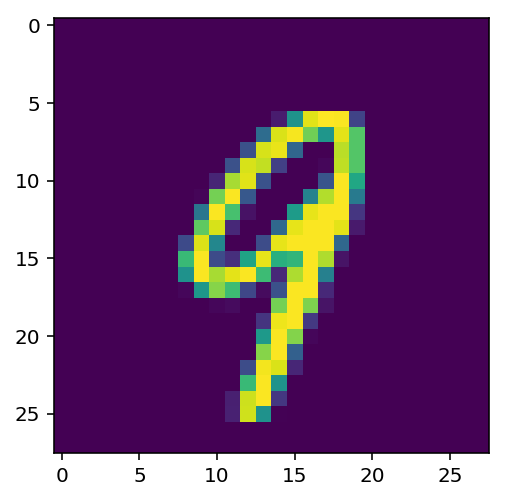

In [7]:
plt.imshow(images[1].numpy().squeeze())

**Exercise**: 
Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next

inputs = 784 (x)


hidden units = 256 (h)


output = 10 (y)

In [8]:
#solution
def activation(x):
    #sigmoid activation
    return 1/(1 + torch.exp(-x))


In [13]:
#flatten the input images
inputs = images.view(images.shape[0],-1)
#inputs

#create parameters
w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

#print(w1,b1,w2,b2)


In [14]:
h = activation(torch.mm(inputs,w1) + b1)
out = torch.mm(h,w2) + b2

In [15]:
out

tensor([[  4.4271, -16.0467,  -8.7036,  10.1076,   2.2282,  15.8181,  -5.6912,
           3.6021, -18.6088,  -0.1671],
        [ -3.4397,  -6.5920,   0.7185,   2.6913,   9.5039,   9.6732,  -3.4791,
          -0.9720, -24.3249,   5.8168],
        [  4.5698, -10.6528, -13.2498,   0.7073,  10.2393,   6.0818,  -5.1719,
          -5.6147, -23.2898,   1.0527],
        [ -0.3484,  -0.7832,  -1.2952,  -3.0962,  19.4188,   3.4055,  -4.8005,
           8.9173, -18.6277,  -4.1022],
        [  4.1136, -16.3325,  -0.5591,   3.5980,   4.3833,   4.7440, -19.1738,
          -6.4344, -25.1976,  -2.2279],
        [ -1.1208,   1.4825,  -2.9020,   5.9505,  13.4303,   7.4345, -18.0076,
          -8.3061, -18.2107,  -1.6301],
        [ -0.7744, -20.6183, -14.1120,   7.1365,   3.9934,   8.9876,  -2.1790,
           1.6805, -15.8376,  -7.8509],
        [ -8.4008, -10.6233,  -4.2186,   1.5524,  17.0662,  -1.7018,  -9.2277,
          -7.4391, -16.2941,  -0.3895],
        [  4.8238, -10.1115, -12.5755,   9.6713,

**Exercise**: 

Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. 

If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. 

The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. 

Pay attention to how you take the sum as well. 

You'll need to define the dim keyword in torch.sum. 

Setting dim=0 takes the sum across the rows while dim=1 takes the sum across the columns.
    

In [16]:
n1 = torch.exp(out)
n1

tensor([[8.3687e+01, 1.0740e-07, 1.6598e-04, 2.4528e+04, 9.2827e+00, 7.4083e+06,
         3.3757e-03, 3.6675e+01, 8.2854e-09, 8.4612e-01],
        [3.2073e-02, 1.3713e-03, 2.0513e+00, 1.4752e+01, 1.3412e+04, 1.5886e+04,
         3.0837e-02, 3.7833e-01, 2.7278e-11, 3.3589e+02],
        [9.6523e+01, 2.3636e-05, 1.7606e-06, 2.0285e+00, 2.7982e+04, 4.3780e+02,
         5.6737e-03, 3.6439e-03, 7.6801e-11, 2.8653e+00],
        [7.0580e-01, 4.5696e-01, 2.7385e-01, 4.5219e-02, 2.7132e+08, 3.0130e+01,
         8.2258e-03, 7.4598e+03, 8.1301e-09, 1.6536e-02],
        [6.1169e+01, 8.0700e-08, 5.7172e-01, 3.6524e+01, 8.0102e+01, 1.1489e+02,
         4.7088e-09, 1.6054e-03, 1.1398e-11, 1.0775e-01],
        [3.2603e-01, 4.4040e+00, 5.4915e-02, 3.8394e+02, 6.8030e+05, 1.6933e+03,
         1.5115e-08, 2.4700e-04, 1.2336e-08, 1.9591e-01],
        [4.6098e-01, 1.1106e-09, 7.4345e-07, 1.2571e+03, 5.4237e+01, 8.0033e+03,
         1.1316e-01, 5.3685e+00, 1.3238e-07, 3.8942e-04],
        [2.2469e-04, 2.4342

In [18]:
d1 = torch.sum(torch.exp(out))
d1

tensor(2786812928.)

In [19]:
d1 = torch.sum(torch.exp(out),dim = 1)
d1

tensor([7.4330e+06, 2.9651e+04, 2.8521e+04, 2.7133e+08, 2.9337e+02, 6.8239e+05,
        9.3205e+03, 2.5808e+07, 1.6290e+04, 1.7269e+04, 1.8664e+04, 7.8740e+03,
        9.9759e+02, 1.1064e+08, 1.0542e+09, 2.8730e+06, 1.8618e+04, 3.1200e+06,
        1.4515e+04, 6.2850e+06, 7.6844e+03, 7.5573e+03, 1.5869e+05, 4.0040e+04,
        7.7227e+03, 2.0062e+05, 1.0842e+06, 2.7181e+06, 1.3764e+02, 2.0000e+06,
        4.6064e+03, 3.4473e+04, 2.8040e+07, 8.5937e+06, 6.3127e+05, 2.1113e+05,
        8.2698e+08, 1.8967e+05, 5.0273e+05, 4.6342e+05, 6.7972e+05, 4.4294e+05,
        6.0625e+03, 5.3295e+05, 8.1929e+06, 6.3255e+07, 1.1794e+03, 8.7270e+04,
        6.4073e+04, 5.5160e+05, 1.9470e+07, 2.8951e+08, 4.3363e+05, 8.9898e+05,
        1.9704e+06, 8.2382e+06, 3.4311e+07, 6.0986e+04, 6.4673e+03, 1.0497e+05,
        6.0926e+04, 3.4689e+06, 1.1208e+03, 5.9156e+04])

In [20]:
d1 = d1.view(-1,1)
d1

tensor([[7.4330e+06],
        [2.9651e+04],
        [2.8521e+04],
        [2.7133e+08],
        [2.9337e+02],
        [6.8239e+05],
        [9.3205e+03],
        [2.5808e+07],
        [1.6290e+04],
        [1.7269e+04],
        [1.8664e+04],
        [7.8740e+03],
        [9.9759e+02],
        [1.1064e+08],
        [1.0542e+09],
        [2.8730e+06],
        [1.8618e+04],
        [3.1200e+06],
        [1.4515e+04],
        [6.2850e+06],
        [7.6844e+03],
        [7.5573e+03],
        [1.5869e+05],
        [4.0040e+04],
        [7.7227e+03],
        [2.0062e+05],
        [1.0842e+06],
        [2.7181e+06],
        [1.3764e+02],
        [2.0000e+06],
        [4.6064e+03],
        [3.4473e+04],
        [2.8040e+07],
        [8.5937e+06],
        [6.3127e+05],
        [2.1113e+05],
        [8.2698e+08],
        [1.8967e+05],
        [5.0273e+05],
        [4.6342e+05],
        [6.7972e+05],
        [4.4294e+05],
        [6.0625e+03],
        [5.3295e+05],
        [8.1929e+06],
        [6

In [21]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim = -1).view(-1,1)


In [22]:
probabilities = softmax(out)
probabilities

tensor([[1.1259e-05, 1.4450e-14, 2.2330e-11, 3.2999e-03, 1.2488e-06, 9.9668e-01,
         4.5415e-10, 4.9341e-06, 1.1147e-15, 1.1383e-07],
        [1.0817e-06, 4.6247e-08, 6.9180e-05, 4.9750e-04, 4.5233e-01, 5.3576e-01,
         1.0400e-06, 1.2759e-05, 9.1995e-16, 1.1328e-02],
        [3.3842e-03, 8.2870e-10, 6.1730e-11, 7.1122e-05, 9.8109e-01, 1.5350e-02,
         1.9893e-07, 1.2776e-07, 2.6928e-15, 1.0046e-04],
        [2.6012e-09, 1.6841e-09, 1.0093e-09, 1.6665e-10, 9.9997e-01, 1.1104e-07,
         3.0316e-11, 2.7493e-05, 2.9964e-17, 6.0942e-11],
        [2.0851e-01, 2.7508e-10, 1.9488e-03, 1.2450e-01, 2.7304e-01, 3.9163e-01,
         1.6051e-11, 5.4723e-06, 3.8852e-14, 3.6730e-04],
        [4.7778e-07, 6.4539e-06, 8.0476e-08, 5.6264e-04, 9.9695e-01, 2.4815e-03,
         2.2150e-14, 3.6197e-10, 1.8078e-14, 2.8710e-07],
        [4.9459e-05, 1.1916e-13, 7.9765e-11, 1.3487e-01, 5.8191e-03, 8.5867e-01,
         1.2140e-05, 5.7598e-04, 1.4203e-11, 4.1781e-08],
        [8.7060e-12, 9.4316

In [23]:
#shape should be 64,10, same as out
print(probabilities.shape)

torch.Size([64, 10])


In [24]:
#sum of each column should be 1 i.e. normalized
print(probabilities.sum(dim = 1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
